# Georaster Visualization
## 1. DEM 
A 3d viewer of a subset of downloaded ALOS DEM, JAXA.

rasterio, matplotlib, plotly, earthpy, numpy

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import earthpy.plot as ep
import rasterio 
import numpy as np
from matplotlib import cm
import plotly.graph_objects as go

In [2]:
src = rasterio.open(r'raster\waterDEM30m.tif')
band1 = src.read(1)

from geopyfsn import getxy # personal function
x, y = getxy(src)
X, Y = np.meshgrid(x,y)

static 3d surface plot with contour

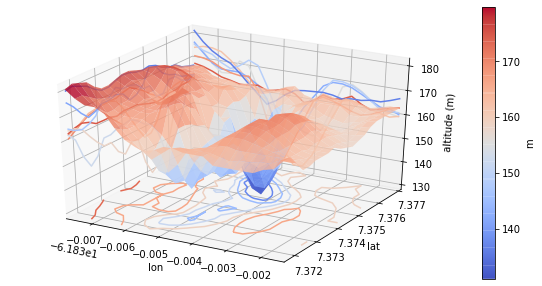

In [3]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
# ax.plot_surface(X, Y, band1, rstride=8, cstride=8, alpha=0.3)
surf = ax.plot_surface(X, Y, band1,  cmap=cm.coolwarm, alpha=0.8)
cset = ax.contour(X, Y, band1, zdir='z', offset=band1.min(), cmap=cm.coolwarm)
cset = ax.contour(X, Y, band1, zdir='x', offset=min(x), cmap=cm.coolwarm)
cset = ax.contour(X, Y, band1, zdir='y', offset=max(y), cmap=cm.coolwarm)

ax.set_xlabel('lon')
ax.set_xlim(min(x), max(x))
ax.set_ylabel('lat')
ax.set_ylim(min(y), max(y))
ax.set_zlabel('altitude (m)')
ax.set_zlim(np.nanmin(band1), np.nanmax(band1))
colo = fig.colorbar(surf)
colo.ax.set_ylabel('m')
plt.show()

static 2d view

<Figure size 432x288 with 0 Axes>

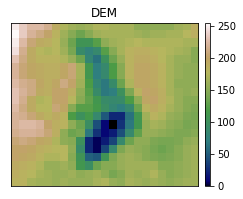

In [6]:
fig = plt.figure()
ep.plot_bands(
    band1,
    cmap="gist_earth",
    title="DEM",
    figsize=(5, 3),
)
plt.show()


interactive 3d view

In [3]:
fig = go.Figure(data=go.Surface(
    x=X,
    y=Y,
    z=band1,
    colorbar=dict(title="Elevation (m)")
    ))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Reservoir 3d View', autosize=False,height=500,width=800)
fig.show()
fig.write_html(r"dataVisualHTML\dem3d.html")